결정 트리와 앙상블
- 결정트리는 데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 적음. 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져야 하며, 이로 인해 과적합이 발생해 반대로 예측 성능이 저하될 수 있음
- 이런 단점이 앙상블 기법에서는 오히려 장점. 앙상블은 매우 많은 여러개의 약한 학습기(예측 성능이 상대적으로 떨어지는 학습 알고리즘)를 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트하면서 예측 성능을 향상시키는데, 결정 트리가 좋은 약한 학습기가 되기 때문 (GBM, XGBoost, LightGBM)

결정 트리
- 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만듬(if-else 기반 규칙)
- 데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될것인가가 알고리즘의 성능을 좌우

정보 이득
- 엔트로피는 주어진 데이터 집합의 혼잡도를 의미, 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮음. 정보 이득 지수는 1에서 엔트로피 지수를 뺀 값. 1 - 엔트로피 지수. 결정 트리는 이 정보 이득 지수로 분할 기준을 정함. 정보 이득이 높은 속성을 기준으로 분할함

지니 계수
- 불평등 지수. 0이 가장 평등하고 1로 갈수록 불평등. 데이터가 다양한 값을 가질수록 평등하며, 특정 값으로 쏠릴 경우 불평등한 값이 됨. 다양성이 낮을 수록 균일도가 높다는 의미로서, 1로 갈수록 균일도가 높으므로 지니 계수가 높은 속성을 기준으로 분할함

In [1]:
## using graphviz 
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot
## 아래 있는것은 필수는 아닌데, 가끔 에러가 생길 때가 있어서, 그냥 같이 해줌. 
!apt-get install graphviz libgraphviz-dev pkg-config
!pip install pygraphviz
import pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  libgraphviz-dev libgvc6-plugins-gtk libxdot4
0 upgraded, 3 newly installed, 0 to remove and 7 not upgraded.
Need to get 91.3 kB of archives.
After this operation, 425 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libxdot4 amd64 2.40.1-2 [15.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgvc6-plugins-gtk amd64 2.40.1-2 [18.2 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgraphviz-dev amd64 2.40.1-2 [57.3 kB]
Fetched 91.3 kB in 1s (114 kB/s)
Selecting previously unselected package libxdot4.
(Reading databa

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTreeClassifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

In [0]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

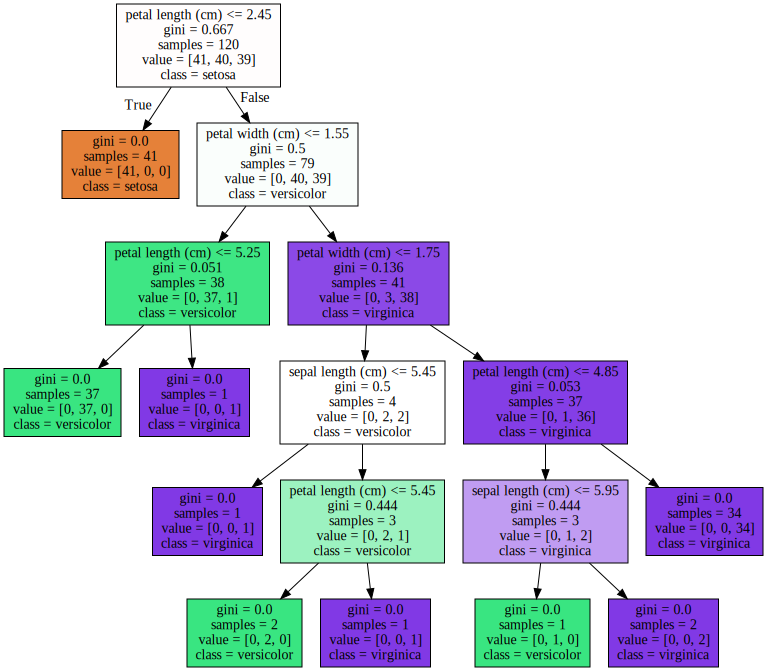

In [15]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- petal length(cm) <= 2.45 와 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건. 이 조건이 없으면 리프 노드임
- gini는 다음의 value=[]로 주어진 데이터 분포에서의 지니 계수
- samples는 현 규칙에 해당하는 데이터 건수
- value = []는 클래스 값 기반의 데이터 건수
- class는 value 리스트 내에 가장 많은 건수를 가진 결정값

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


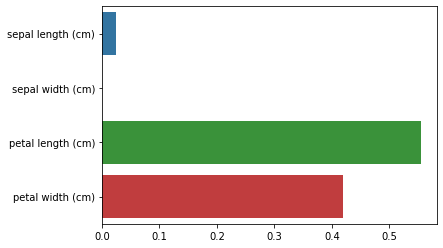

In [16]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

# feature 별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

결정 트리(Decision TREE) 과적합(Overfitting)

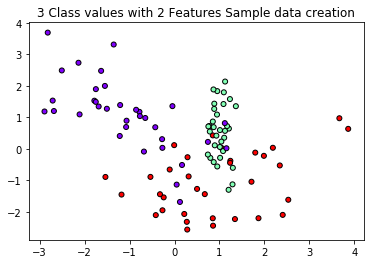

In [21]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Features Sample data creation')

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3,
                                           n_clusters_per_class=1, random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

In [0]:
import numpy as np

# Classifier 의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
  fig, ax = plt.subplots()

  # 학습 데이타 scatter plot으로 나타내기
  ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k', clim=(y.min(), y.max()), zorder=3)
  ax.axis('tight')
  ax.axis('off')
  xlim_start, xlim_end = ax.get_xlim()
  ylim_start, ylim_end = ax.get_ylim()

  # 호출 파라미터로 들어온 training 데이타로 model 학습.
  model.fit(X, y)

  # meshgrid 형태인 모든 좌표값으로 예측 수행.
  xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200), np.linspace(ylim_start, ylim_end, num=200))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

  # contourf() 를 이용하여 class boundary를 visualization 수행
  n_classes = len(np.unique(y))
  contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, 
                         cmap='rainbow', clim=(y.min(), y.max()), zorder=1)

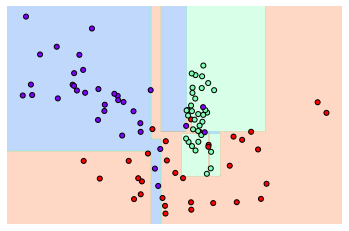

In [26]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

Human Activity Recognition
- https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials 

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '14LoA41ooTFHpQ4ApQgX9DDoCAMYjQwuV' # url에서 file id만 copy/paste
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('features.txt')

file_id = '15l8T6S_zl2eGQ4wpk3O_IAraQNbEweqq'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('X_train.txt')

file_id = '1_oSZJCT-JeXDuI50Qgaw8WeI64ARetRt'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('X_test.txt')

file_id = '1Brie2VEVhzvzk3LS7piksHzAqh_iaXX_'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('y_train.txt')

file_id = '1vjxC8PCXNCp-i7dd6iCenpGPlULPBYLq'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('y_test.txt')

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리 되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])
feature_name_df.head(20)

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
5,6,tBodyAcc-std()-Z
6,7,tBodyAcc-mad()-X
7,8,tBodyAcc-mad()-Y
8,9,tBodyAcc-mad()-Z
9,10,tBodyAcc-max()-X


In [0]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [46]:
pd.options.display.max_rows = 10
new_feature_name_df = get_new_feature_name_df(feature_name_df)
new_feature_name_df[new_feature_name_df['dup_cnt'] > 0]

,column_index,column_name,dup_cnt
316,317,"fBodyAcc-bandsEnergy()-1,8_1",1
317,318,"fBodyAcc-bandsEnergy()-9,16_1",1
318,319,"fBodyAcc-bandsEnergy()-17,24_1",1
319,320,"fBodyAcc-bandsEnergy()-25,32_1",1
320,321,"fBodyAcc-bandsEnergy()-33,40_1",1
...,...,...,...
497,498,"fBodyGyro-bandsEnergy()-17,32_2",2
498,499,"fBodyGyro-bandsEnergy()-33,48_2",2
499,500,"fBodyGyro-bandsEnergy()-49,64_2",2
500,501,"fBodyGyro-bandsEnergy()-1,24_2",2


In [0]:
import pandas as pd

def get_human_dataset():

  # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백문자를 sep으로 할당.
  feature_name_df = pd.read_csv('features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])
  # 중복된 feature 명을 새롭게 수정하는 get_new_feature_name_df()를 이용하여 새로운 feature명 DataFrame 생성.
  new_feature_name_df = get_new_feature_name_df(feature_name_df)
  # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
  feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

  # 학습 피처 데이터 셋과 테스트 피처 데이터를 DataFrame으로 로딩. 컬럼명은 feature_name 적용
  X_train = pd.read_csv('X_train.txt',sep='\s+', names=feature_name)
  X_test = pd.read_csv('X_test.txt',sep='\s+', names=feature_name)

  # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 컬럼명은 action으로 부여
  y_train = pd.read_csv('y_train.txt', sep='\s+', header=None, names=['action'])
  y_test = pd.read_csv('y_test.txt', sep='\s+', header=None, names=['action'])

  # 로드된 학습/테스트용 DataFrame을 모두 반환
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [53]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [54]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [55]:
X_train.isna().sum().sum()

0

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


In [58]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : [6, 8, 10, 12, 16, 20, 24]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.9min finished


GridSearchCV 최고 평균 정확도 수치:0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


In [59]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성.
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_Depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [60]:
max_depths = [6, 8, 10, 12, 16, 20, 24]

# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
  dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  print('max_depth - {0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth - 6 정확도: 0.8558
max_depth - 8 정확도: 0.8707
max_depth - 10 정확도: 0.8673
max_depth - 12 정확도: 0.8646
max_depth - 16 정확도: 0.8575
max_depth - 20 정확도: 0.8548
max_depth - 24 정확도: 0.8548


In [61]:
params = { 
    'max_depth' : [8, 12, 16, 20], 
    'min_samples_split' : [16, 24]
}
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.3min finished


GridSearchCV 최고 평균 정확도 수치:0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [62]:
best_df_clf = grid_cv.best_estimator_

pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


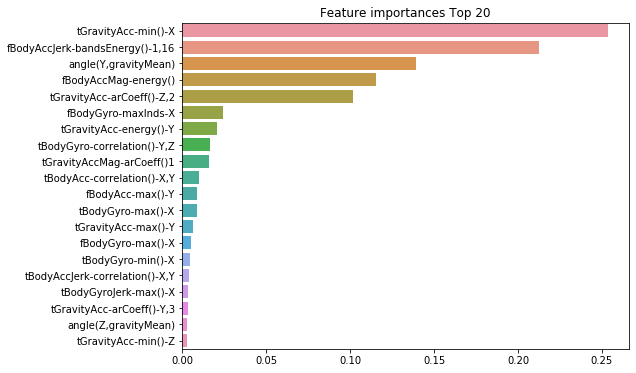

In [65]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_

# Top 중요도로 정렬을 쉽고 하고, Seaborn의 막대그래프로 수비게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

# 중요도 값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()